In [138]:
using CSV, DataFrames, wgregseq, CairoMakie, Statistics, BioSequences

import BioSequences.reverse_complement
reverse_complement(x::AbstractString) = string(reverse_complement(LongDNA{4}(x)))

reverse_complement (generic function with 3 methods)

In [139]:
wgregseq.plotting_style.default_makie!()

## Mapping

In [156]:
df_map = CSV.read(
    "../../../data/barcodes/20230129_mapping/mapping_identified.csv",
    DataFrame,
    header=["promoter", "barcode", "map_count", "name", "nmut"]
)
sort!(df_map, :map_count, rev=true)
df_map = df_map[df_map.map_count .> 1, :]
first(df_map, 5)
unique(df_map.name)

26-element Vector{String}:
 "araBp"
 "*"
 "xylFp"
 "xylAp"
 "znuCp"
 "rspAp"
 "icdC_predicted"
 "ymfM_beeE_jayE_ymfL_ymfR_tfaP_ymfT_ymfN_ycfK_ymfQ_predicted"
 "mglBp"
 "TSS_4654_wanner_regulondb"
 "marRp"
 "tabA_predicted"
 "galEp3"
 "hyuA_predicted"
 "gyrAp"
 "ybiY_ybiW_predicted"
 "galEp2"
 "tfaE_stfE_predicted"
 "galEp1"
 "ygeX_predicted"
 "crpp3"
 "dinQp"
 "ygeW_predicted"
 "mprAp"
 "crpp2"
 "ybeDp"

Filter out non-unique barcodes.

Number of mutations

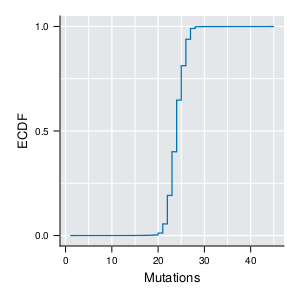

In [157]:
fig = Figure(resolution=(300, 300))
df_map = df_map[df_map.name .!= "*", :]
ax = Axis(fig[1, 1], xlabel="Mutations", ylabel="ECDF")
lines!(ax, sort(df_map.nmut), 1/nrow(df_map):1/nrow(df_map):1)
fig

In [158]:
df_map = df_map[df_map.nmut .< 30, :]

gene_list = ["araBp", "znuCp", "xylAp", "xylFp", "rspAp"]
df_map = df_map[map(x -> x in gene_list, df_map.name), :]
sort!(df_map, :map_count, rev=true)


Row,promoter,barcode,map_count,name,nmut
,String,String31,Int64,String,Int64
1,TCCACATTGACTGTTTGCACGGCATCACATTTTGCTATGCCATAGCATTTTTATCCATAAGAGTAGCGGATCCTACCTGACGCTTTTTATCGCATCTCTCTACTGTTTCTCCATACCCGGTCATTAGGATGGAGTGAAATGATGGGGATCGCAAGTCGAG,TTGCGATCCCCATCATTTCA,1966,araBp,20
2,AATTGCGCAACAAAAGTAAGATCACGGTAACAAATCAAGAACTAAACCAAAAATCGTAATCGTAACATACAAATCTGCAATTGTTTTCCCCTGTTCCGTTGCGAAAAATTTGTTACGATTATCGCGGTGATTGTCACTTATTAAAACTGTCGAGCATCGG,AGTTTTAATAAGTGACAATC,1147,xylFp,16
3,ATTTGCGCAACAAAAGTACGATCTAAGTCACAACTCATGAAATAAACCAAAAATCGTCATCGAAAGATAAAAATCTGCGATTGTTTTCCCCTGTTTAGTTACAAAAAATTGGTTACGTCTATCGCGGTGATTGTTAGTTATTAAAACTGTCGAGCATCGG,AGTTTTAATAACTAACAATC,620,xylFp,16
4,CCACTTTGATCTATACATTTTCCCTTGCGAGAGAGCGCAAACTTGTGATTTATCTCAATATCAGGGTGAAATAACATAATTGAGCAACTGAAAGGGAGTTCCCAATATTCCGACATCATCCATCACCCGCGGCATTACCTGATTATGGCGTTCAATATGC,CGCAGCATTTATTAGGAGGC,85,xylAp,25
5,AATTGCGCAACAAACGTAAGATCTCGGTCATATATCAGGAAATAAACCAAAAGTTGTTATCGAAAGATAAAAATCTGTTATTGTTTTCCCCTGTTCAGCTGCTAAAACTTGGTTTCGTTTATCGAGGTTACTGTTACTTTTTTAAACTGTCCTCTAACTA,CCTCCTAAATTTGGGGTTCC,69,xylFp,25
6,CCAGTTTCATCATTCCACTTTATTTTGCGAGCGCGCGCACACATGACAATTATCGCAATTGAAGTGTGACATAACATAATTGAGCAACTGAAGGGGAGTGCCCAATATTACGACAGCATCCTTCACCCATGGCATTACCAGATTATGGAGTTCAATAGGC,GAACTGCAGAATGGACTATA,68,xylAp,25
7,TAGACATCGATAATTTGCATGGCGCCACACTTTGCTATGCCATATCATTTTTATCCATAAGGTTAGTGGATCCTACCTGACGCTTTTAATTGCAACTCTCTACTGTTTCTCCATCGCCGTTTTGTTGGATGGTGTGAAACGTTGGCGATTGCAATTGGCC,ACAGCTCCACTTTTTGAAGG,65,araBp,23
8,TCCACATTGATTATCTGCACGGCGTCACACTATGCTATGCCAGAGCATTTATATCCATAAGATTAGCGGATCCTACCTGACGCGTCTGATCGGAGCTCTCTACTGTTTCTCCATTCCGGTTTGTTTAGATGGAGTGAAACGATGTCGATCGCAATGGGCC,GCGCGTATATGCAGGTCCAT,61,araBp,24
9,TCCACATTGATTATTTCCACGGCGACACACTTTGCTATGCCATAGCATTTTTATCCTTAAGGGTAGCAGATCCTACCTGACGCTCTCTATCGCAACCCTCTACCGGTTCTTCATACCCGTTTTTTTGCATGGAGTGACACGAGGGCGATTGCAATTGGAC,GGACGCTCCGAAAATGCGGC,58,araBp,24


Total counts per promoter.

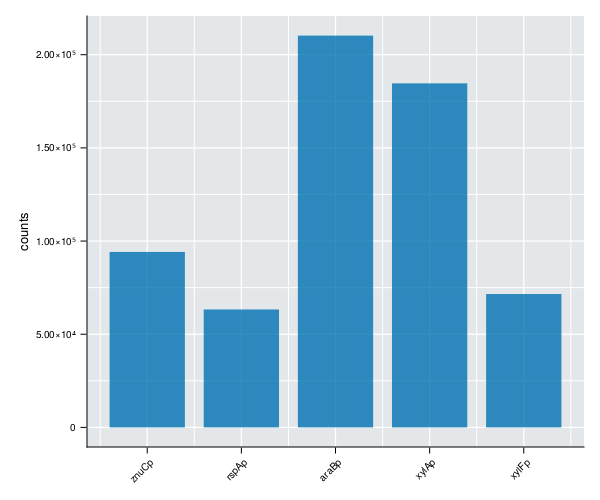

In [159]:
df = combine(groupby(df_map, :name), nrow)
fig = Figure(resolution=(600, 500))
ax = Axis(fig[1, 1], ylabel="counts", xticks=(collect(1:nrow(df)), df.name), xticklabelrotation=π/4, xticklabelsize=10)

barplot!(ax, df.nrow)

fig

Filter out sequences with single reads.

In [160]:
df = df_map[(df_map.map_count .> 2) .& (df_map.nmut .< 30), :]

num_unique(x) = length(unique(x))

combine(groupby(df, :name), :promoter => num_unique)

Row,name,promoter_num_unique
,String,Int64
1,znuCp,2383
2,rspAp,2261
3,araBp,5181
4,xylAp,4472
5,xylFp,2297


[4, 2, 2, 1, 2, 1, 4, 4, 3, 1]
[3, 4, 3, 4, 4, 3, 2, 1, 2, 2]
[2, 2, 1, 3, 4, 4, 4, 2, 1, 4]
[1, 1, 4, 4, 3, 2, 3, 2, 1, 1]
[4, 4, 4, 2, 1, 4, 2, 4, 4, 4]


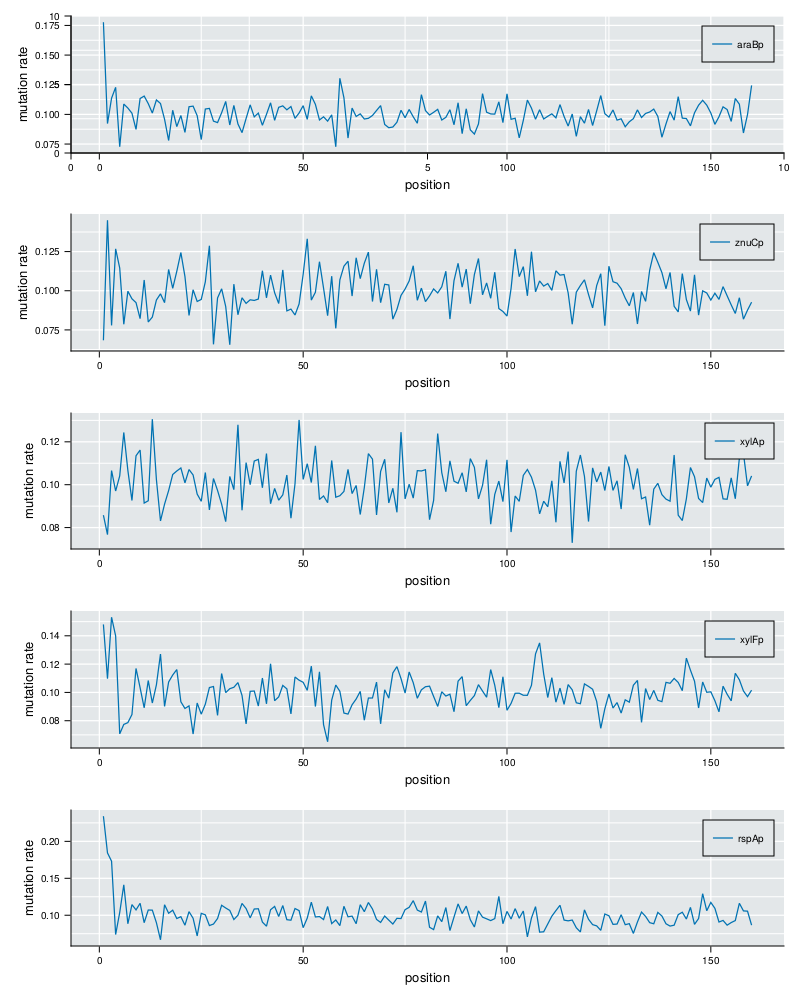

In [179]:
fig = Figure(resolution=(800, 1000))
ax = Axis(fig[1, 1])
for (i, prom) in enumerate(gene_list)
    ax = Axis(fig[i, 1], xlabel="position", ylabel="mutation rate")
    promoters = df_map[df_map.name .== prom, :promoter] 
    mut_rates = 1 .- maximum(PFM(LongDNA{4}.(promoters)) ./length(promoters), dims=1) |> vec
    wt_letters = [x[1] for x in argmax(PFM(LongDNA{4}.(promoters)) ./length(promoters), dims=1)]
    println(wt_letters[1:10])
    lines!(ax, mut_rates, label=prom)
    axislegend(ax)
end

fig

## DNA reads

In [85]:
df_DG = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/DG_collapsed.txt", 
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["ct_0", "barcode"]
);

In [86]:
df_DP = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/DP_collapsed.txt",
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["ct_0", "barcode"]
);

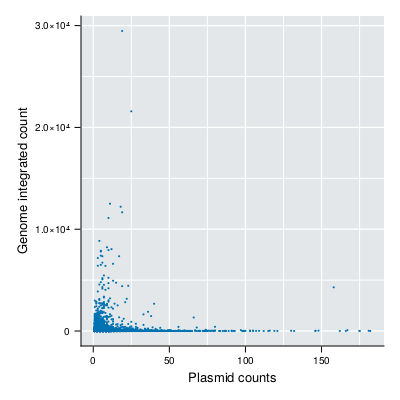

In [90]:
df_DG_map = innerjoin(df_map, df_DG, on=:barcode, makeunique=true)
df_DP_map = innerjoin(df_map, df_DP, on=:barcode, makeunique=true)

df_join = outerjoin(df_DG_map, df_DP_map, makeunique=true, on=:barcode)
rename!(df_join, Dict("ct_0" => "ct_g", "ct_0_1" => "ct_p"))

fig = Figure(resolution=(400, 400))
ax = Axis(fig[1, 1], xlabel="Plasmid counts", ylabel="Genome integrated count")
scatter!(ax, df_join.ct_p, df_join.ct_g, markersize=3)

fig


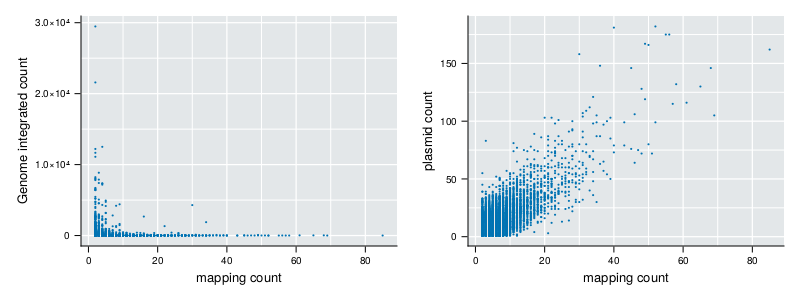

In [92]:
fig = Figure(resolution=(800, 300))

ax = Axis(fig[1, 1], xlabel="mapping count", ylabel="Genome integrated count")
scatter!(ax, df_DG_map.map_count, df_DG_map.ct_0, markersize=3)

ax = Axis(fig[1, 2], xlabel="mapping count", ylabel="plasmid count")
scatter!(ax, df_DP_map.map_count, df_DP_map.ct_0, markersize=3)

fig

In [93]:
df_DG_map.ct_0 |> mean |> x -> println("mean genome counts: ", x)
df_DP_map.ct_0 |> mean |> x -> println("mean plasmid counts: ", x)
df_DG_map.ct_0 |> median |> x -> println("median genome counts: ", x)
df_DP_map.ct_0 |> median |> x -> println("median plasmid counts: ", x)

mean genome counts: 45.456458901599966
mean plasmid counts: 3.3963009637859685
median genome counts: 4.0
median plasmid counts: 3.0


## RNA Reads

Row,promoter,barcode,map_count,name,nmut,ct_1
,String,String31,Int64,String,Int64,Int64
1,CCACTTTCAGCATTCCATTTTATTTTGCGAGCGAGCGCGCCCTTGTGAGTTATCTCAATAGCAGTGTGGAATAACATAATTGAGCAACTGAAAGAGAGTGCCCAATAAAACGACATGTTCCTTCATCCGCGGCATTACCTGTTTATTGATTTCAATATGC,ACACACAGGTACAGGGATTA,28,xylAp,25,1
2,CCCGTTTCATCATTCCATGTTTTTTAGCGAGCGAGCGCACATTTGTGAACTATCTCGCTAGCAGTGTGAAATAACATAATTGATCAAGGGAAAGGGACTGCCCAATATAACGACATCATCCATCATCCGCTGCATTACCTGACTATGGAGTTCAATATGC,GGTCTAAAATTAACATTTTA,27,xylAp,25,622
3,CCAGTTTCGTCATTCCACTTTATTCTGCGAGCGAGCTAAGATTTGTGAATTATCTCAATAGCAGTGTGAAGTAACATAATTGAGCAACTGAAAGGGAGTGCCCAATAGTACGATATCTTCCATCACCCATGGCATCACCTGATGATGGAGTTCAATATGA,TCAGTGTCGGCGAATCGTAA,27,xylAp,24,1
4,CCGGTTTCATCATTCCCTTTTTTTTTGCAAGCGAGCCCTCACTTGTGAATTATCTCAATAGCAGTGTGAAATAAAATAGTTGAGCTACTGACAGGGAGTGCCCAATATTTCCGCATCATCCATGACCCGCGGAATTACCTGATTATGGAGTACAATATGC,ATTCCGCCTACCGTTGTCCT,26,xylAp,24,1
5,TTCTCATTGCTTAGTTGCACGGCTTCACACTTTGCTATGCCATAGCATTTTTATCCATAAGATTAGCGGATCCTCCCTGACGCTTTTTGTCGCAACTCTCTAGTTTTTCACCATCCCCGTTTTTGTGGATGGAGTGAAACGATGACGATTCCATTTGTCC,ATGCGCTGGAGTCAATTCTA,25,araBp,20,844
6,TTCACTTAGATCATTTGCACTGCGTCACATTTTGCTATGCCCTAGCATTGTTATCCATACGATTAGCGGATCCTACCTGCCGCTTTTTATCGCACCTCTCTACTGTTTATCCATATCCGTTTTTGTGGATGGAGTGAAACGATGGCGATGGCAATCGGCC,TGCGCCAGCACGACCAGAGG,25,araBp,21,1
7,TCCGCATTGATTATTTGCACGGCGTCACACCTTGCTATGCCATATGATTTTTATCATCAAGATTTGCGGATCCTACCTTACGCTTTTTATCCCAACTCTCTACTGTTTATCCATACCCGTTTTATTGGATGGAGGGAAACGATGGCGATTCCAATGGTCC,GACATGACCACGATCCGCGT,23,araBp,23,716
8,GAGTAGCACCTCCCCAGAGAGCGGCGGATACTGCTGCGAAAAGAAGCGTTATATTTGGTAACACACTGCGGCCAATAATCCTAATGAGTATGAGAAGCGTGATATTATAACATTTCATGGCTACTGCAAGACTAAAATTAACATGACAAGTCTTGTTTCG,AACTCATTTCCAACCTCGCA,23,znuCp,21,569
9,TTTCATCTATTGGCAAGCATTCACAGCCCAAATATACGCCTTTTTTTCTGATAACTCCGGCTTTTTTCGATCTTTATACTTGAACGGTAGGAGCTCAGTTGCGTATAAGTCATGCAGCACGACAAGCGATGTAAGTAATCGAACATGAAGATCTTAAAGG,GCAGTGCAGACCGAAACTGC,23,rspAp,25,1071


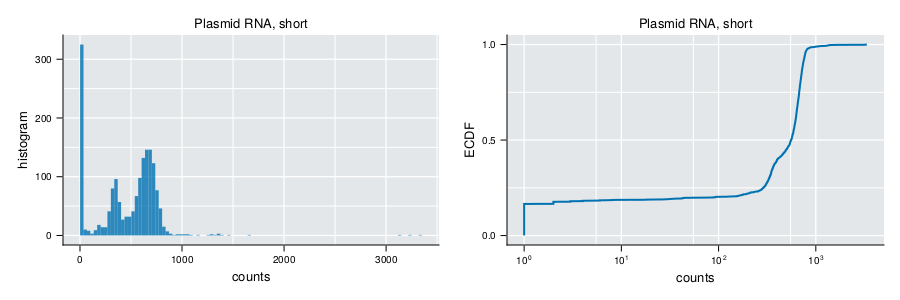

In [133]:
df_RP = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/RP88_collapsed.txt", 
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["ct_1", "barcode"]
)

df_RP = innerjoin(df_map, df_RP, on=:barcode, makeunique=true)
first(df_RP, 10) |> display

fig = Figure(resolution=(900, 300))

ax1 = Axis(fig[1, 1], xlabel="counts", title="Plasmid RNA, short", ylabel="histogram")
hist!(ax1, df_RP.ct_1, bins=100)
ax2 = Axis(fig[1, 2], xlabel="counts", xscale=log10, title="Plasmid RNA, short", ylabel="ECDF")
lines!(ax2, sort(df_RP.ct_1), 1/nrow(df_RP):1/nrow(df_RP):1, linewidth=2)

fig

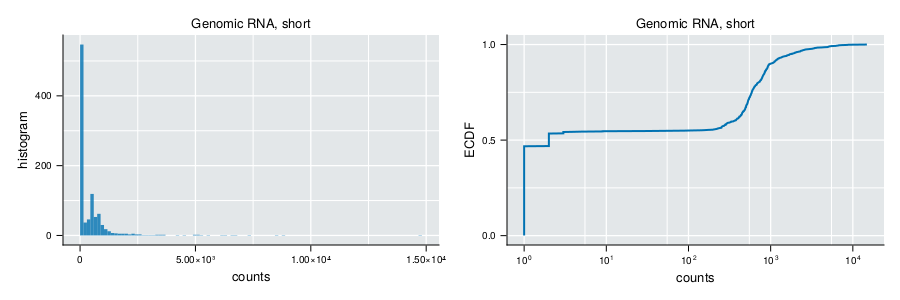

In [135]:
df_RG = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/RG88_collapsed.txt", 
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["ct_1", "barcode"]
)

df_RG = innerjoin(df_map, df_RG, on=:barcode, makeunique=true)
first(df_RG, 10)


fig = Figure(resolution=(900, 300))

ax1 = Axis(fig[1, 1], xlabel="counts", title="Genomic RNA, short", ylabel="histogram")
hist!(ax1, df_RG.ct_1, bins=100)
ax2 = Axis(fig[1, 2], xlabel="counts", xscale=log10, title="Genomic RNA, short", ylabel="ECDF")
lines!(ax2, sort(df_RG.ct_1), 1/nrow(df_RG):1/nrow(df_RG):1, linewidth=2)

fig

Row,promoter,barcode,map_count,name,nmut,ct_1
,String,String31,Int64,String,Int64,Int64
1,TATCATCTTTTGTCAACCATGCACACGGTAAATATACCCCTTTTTTTGTGATCATTCCGGCATTTTTCGATCTTTATACTTGTATTGTAGTAGCTAAGTTGGGTAGATTTCATGCTTCACGACAAGCGATCCAAGGGATCGAAGATGATGATCGTAAAGG,GTGCTCACATCATGAGTGAG,18,rspAp,24,2
2,TGCAGATTTATTATTTGCGCGGCGTCACACTTTGCTATGCCATATCGTTTTTGTCCATAAAATTAGCGGATCCTACCTGACGCTTTTTACCACAACTCTCTACTGTTTCTCTATACCCGTTTTTTAGGATGGAGTAAAAAGATAGCCATTGCAATTGGCC,ACACAATTCTAAGCACCTAC,17,araBp,22,1
3,TCCACATTGACAGTTTGCACGGCGTCACACATTGCTATGTCATAGCATTTTTTTCCATATGATTAGCGGATCCTACCTGACGCCTTTTATCGGACCTCTCTACTGTTTCTCAATACCCGTATTATTGGATGGAGTGAAACGATGGCGGCTGCAATTCGCC,GCGCGTACGAGACCAAATAG,15,araBp,25,1
4,AATAGCGAATCAAAAGTAAGATATCGGTCATAGATCAAGAAAAAAACCAAAAATCGTAATCGAAAGAAAAAAATATGTAATTGTTGTCCCCTGTTTATTGGCTAAAAATTGGTTCCGTTTATCGCGGTAATTGTTACTTATAAAAACCGTCCTCTGACTA,AGCTGTTCTAGAGCGTCAAC,14,xylFp,22,1
5,CCTGATGTTTTGTCAACCATTCACAGCGCAAATATGCGCCTTTGTTTGTGAACACTCCGGCTTTATTCGATCTTTATACTTGTATGTTACTAGCTCAAGTGCGTAGATTTCGTGCATTACGACAAGCGATGCAAGGAATCGAACATTAAAATCGTAAAGG,CAATGAGTATCATTCTAATG,11,rspAp,21,1
6,CCAATTTCATCATTCTATTTTATTTTGCCAGCGAGCGCATACTTGTGATTTATCTCAATAGCAGTGTTAAATAACATAATTGTGCAACGAAAAGGGAGTGCCAAATATTACGGCATCATCCATCCCCCGCGGCATTACCTGATGATCGAGTTGAATATGG,CGTAAGTAACTGGCTAGACC,11,xylAp,22,1
7,TCCAGATTGATTATTTGCACGGCGTCAAACTTTCCTCTGCCATAGCATTTATATCCATAATATTAGAGGATACTACCTGACGCTTTTTATCGAAAGTCTCTACTTTTTCTCCCTACCCGTTATTTTGGATGGAGTGAAATGATGACAATTGCAATTGGCC,GCTAGTTCAGGGTGGGATAC,10,araBp,24,1
8,TTCGCATTGATTATTGGTACCGCGTCACACTTTGCTATGCTATAGCATTTTTATCCATAAGATTAGGGGATCCTACCTGACGCTATTTATCGCAACTTGCTACTGTTTCTCGATACCCGTCTATTTGGATGGAGTGAAACGATGGAGAGTGGAATTGGCC,GTGGATCCGCATACACACGG,9,araBp,22,3
9,GTGATGCACCTCCGCAGAGAACGGCGGATACTGCTGCGAAAAGAAGCGCTTTTTTATGTAACATTATGCGACCAACAATCGTAATGAATATGATAAGTGTGATATTATGACATTTCATTAATACTTCAGGACTAATATTACCATGACAAGTCTGGTTTTC,GGCTACTAAGAGTTAAGGAG,8,znuCp,22,1


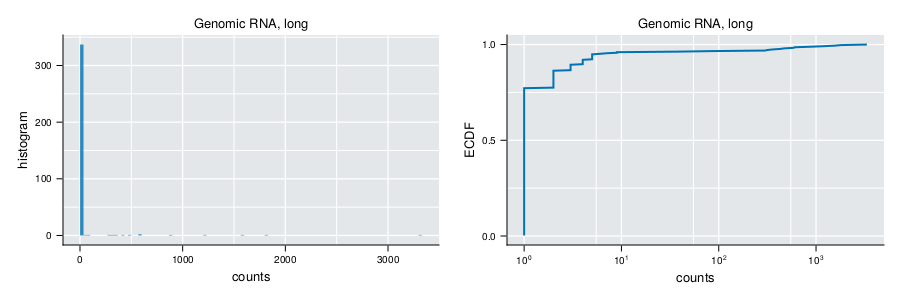

In [136]:
df_RG_260 = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/RG260_collapsed.txt", 
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["ct_1", "barcode"]
)

df_RG_260 = innerjoin(df_map, df_RG_260, on=:barcode, makeunique=true)
first(df_RG_260, 10) |> display

fig = Figure(resolution=(900, 300))

ax1 = Axis(fig[1, 1], xlabel="counts", title="Genomic RNA, long", ylabel="histogram")
hist!(ax1, df_RG_260.ct_1, bins=100)
ax2 = Axis(fig[1, 2], xlabel="counts", xscale=log10, title="Genomic RNA, long", ylabel="ECDF")
lines!(ax2, sort(df_RG_260.ct_1), 1/nrow(df_RG_260):1/nrow(df_RG_260):1, linewidth=2)

fig

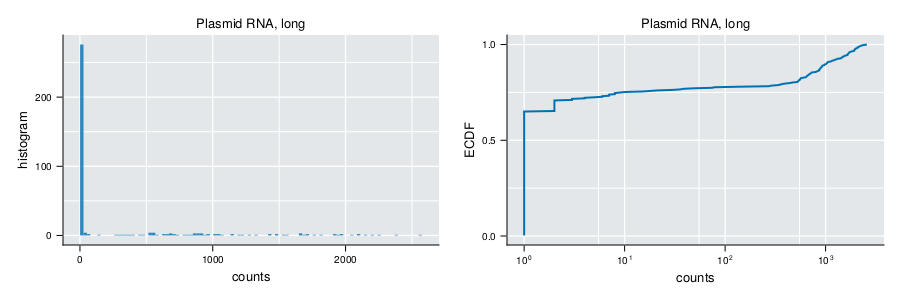

In [137]:
df_RP_260 = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/RP260_collapsed.txt", 
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["ct_1", "barcode"]
)

df_RP_260 = innerjoin(df_map, df_RP_260, on=:barcode, makeunique=true)
first(df_RP_260, 10)

fig = Figure(resolution=(900, 300))

ax1 = Axis(fig[1, 1], xlabel="counts", title="Plasmid RNA, long", ylabel="histogram")
hist!(ax1, df_RP_260.ct_1, bins=100)
ax2 = Axis(fig[1, 2], xlabel="counts", xscale=log10, title="Plasmid RNA, long", ylabel="ECDF")
lines!(ax2, sort(df_RP_260.ct_1), 1/nrow(df_RP_260):1/nrow(df_RP_260):1, linewidth=2)

fig